In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

boston_data = load_boston()


C:\Users\Andrei\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [24]:
x = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

<AxesSubplot:>

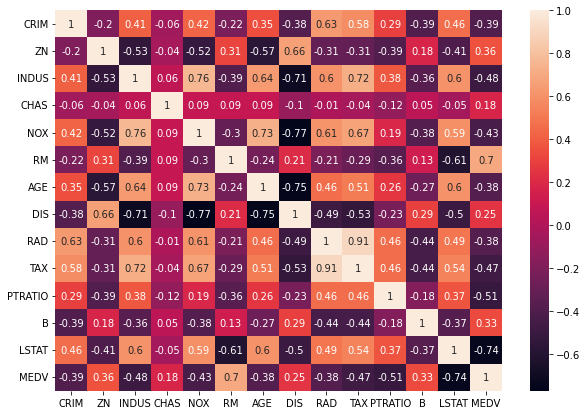

In [25]:
x_corr = x.copy()
x_corr['MEDV'] = y
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10,7))
sns.heatmap(data=correlation_matrix, annot=True)

In [26]:
features = [['LSTAT','RM'], ['LSTAT','RM', 'PTRATIO'], ['LSTAT','RM', 'PTRATIO', 'TAX'], ['DIS', 'AGE'], ['DIS', 'RAD']]

In [32]:
metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  transformer = Normalizer().fit(x_train.loc[:, x_train.columns])
  x_train = pd.DataFrame(transformer.transform(x_train.loc[:, x_train.columns]), index = x_train.index, columns = x_train.columns)
  x_test = pd.DataFrame(transformer.transform(x_test.loc[:, x_test.columns]), index = x_test.index, columns = x_test.columns)

  regr = LinearRegression()
  regr.fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)
  
  metrics = metrics.append({'Features' : future, 
                            'MAE train' : mean_absolute_error(y_train, pred_train), 
                            'MAE test' : mean_absolute_error(y_test, pred_test), 
                            'MSE train' : mean_squared_error(y_train, pred_train), 
                            'MSE test' : mean_squared_error(y_test, pred_test), 
                            'R2 train' : r2_score(y_train, pred_train), 
                            'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)
print('Метрики линейной регрессии')
print(metrics)

Метрики линейной регрессии
                    Features MAE train  MAE test  MSE train   MSE test  R2 train   R2 test
0                [LSTAT, RM]   3.73764  3.704153  25.989649  21.950384  0.697449  0.719641
1       [LSTAT, RM, PTRATIO]  3.375341  3.165985  22.782518  15.738021  0.734784  0.798988
2  [LSTAT, RM, PTRATIO, TAX]  3.408744  3.359143  24.985324  18.729697  0.709141  0.760777
3                 [DIS, AGE]  6.382372  5.948582  78.129578  73.212529  0.090477  0.064901
4                 [DIS, RAD]  6.236853  5.921109  74.797832  66.152299  0.129262  0.155077


C:\Users\Andrei\AppData\Local\Temp\ipykernel_15480\2604633654.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
C:\Users\Andrei\AppData\Local\Temp\ipykernel_15480\2604633654.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
C:\Users\Andrei\AppData\Local\Temp\ipykernel_15480\2604633654.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
C:\Users\Andrei\AppData\Local\Temp\ipykernel_15480\2604633654.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : futu

In [28]:
display(x.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
metricsFR = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  transformer = Normalizer().fit(x_train.loc[:, x_train.columns])
  x_train = pd.DataFrame(transformer.transform(x_train.loc[:, x_train.columns]), index = x_train.index, columns = x_train.columns)
  x_test = pd.DataFrame(transformer.transform(x_test.loc[:, x_test.columns]), index = x_test.index, columns = x_test.columns)

  regr = RandomForestRegressor()
  regr.fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)
  
  metricsFR = metricsFR.append({'Features' : future, 
                            'MAE train' : mean_absolute_error(y_train, pred_train), 
                            'MAE test' : mean_absolute_error(y_test, pred_test), 
                            'MSE train' : mean_squared_error(y_train, pred_train), 
                            'MSE test' : mean_squared_error(y_test, pred_test), 
                            'R2 train' : r2_score(y_train, pred_train), 
                            'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)
print('Метрики модели случайный лес')
print(metricsFR)

C:\Users\Andrei\AppData\Local\Temp\ipykernel_15480\3194445719.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricsFR = metricsFR.append({'Features' : future,
C:\Users\Andrei\AppData\Local\Temp\ipykernel_15480\3194445719.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricsFR = metricsFR.append({'Features' : future,
C:\Users\Andrei\AppData\Local\Temp\ipykernel_15480\3194445719.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricsFR = metricsFR.append({'Features' : future,
C:\Users\Andrei\AppData\Local\Temp\ipykernel_15480\3194445719.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricsFR = metricsFR.append({'

Метрики модели случайный лес
                    Features MAE train  MAE test  MSE train   MSE test  R2 train   R2 test
0                [LSTAT, RM]  1.573124  4.052186   4.909477   32.48191  0.942848  0.585128
1       [LSTAT, RM, PTRATIO]  1.267223  3.152118   3.363411  18.587345  0.960846  0.762595
2  [LSTAT, RM, PTRATIO, TAX]  1.015354   2.78951   2.297427   14.65125  0.973255  0.812868
3                 [DIS, AGE]  2.811599   6.71938  15.535838  87.243624  0.819144  -0.11431
4                 [DIS, RAD]  2.633216  5.905445  14.396594  68.510891  0.832406  0.124952


C:\Users\Andrei\AppData\Local\Temp\ipykernel_15480\3194445719.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricsFR = metricsFR.append({'Features' : future,


В модели линейной регресии по коэффициенту детерминаци, абсолютной и средней ошибке на тестовой 
выбороке наилучший набор факторов:LSTAT, RM, PTRATIO

В модели random foresrt наилучим набором факторов можно назвать: LSTAT, RM, PTRATIO, TAX.

Модель случайный лес с данными факторами имеет коэффициент детерминации ближе к 1, чем наилучший 
по качеству вариант в регрессии, там образом для предстказания больше подойдёт модель random forest.